<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/AccuracyEvaluation/MAE_MSE_RMSE_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/day49-regression-metrics/placement.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Pacage(In LPA)')

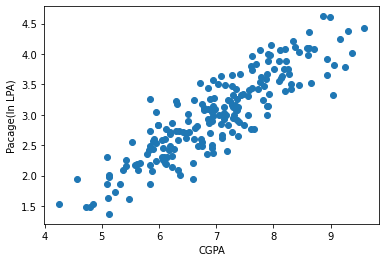

In [7]:
plt.scatter(df.cgpa, df.package)
plt.xlabel("CGPA")
plt.ylabel("Pacage(In LPA)")

In [8]:
X = df.iloc[:,0:1]
y = df.iloc[:, -1]

In [9]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in LPA)')

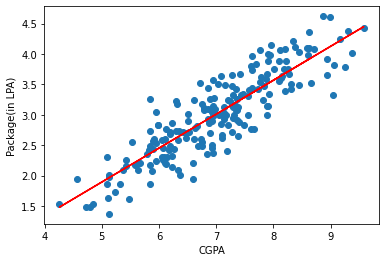

In [15]:
plt.scatter(df.cgpa, df.package)
plt.plot(X_train, lr.predict(X_train), color="red")
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")

# Mean Absolute Error

In [16]:
y_test.iloc[0]

4.1

In [17]:
# traditional way
total = 0
n = len(X_test)
for i in range(n):
  a = y_test.iloc[i]
  b = lr.predict([X_test.iloc[i]])
  total += abs(a-b)
mean = total/n
print("MAE = ", mean[0])

MAE =  0.2884710931878175


In [18]:
# sklearn way

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [19]:
y_pred = lr.predict(X_test)

In [20]:
print("MAE=", mean_absolute_error(y_test, y_pred))

MAE= 0.2884710931878175


# and they look same

# Mean Squared Error

In [21]:
# traditional way
total = 0
n = len(X_test)
for i in range(n):
  a = y_test.iloc[i]
  b = lr.predict([X_test.iloc[i]])
  total += (a-b)**2
mean = total/n
print("MSE = ", mean[0])

MSE =  0.12129235313495526


In [22]:
# sklearn way
print("MSE=", mean_squared_error(y_pred, y_test))

MSE= 0.12129235313495527


# Root Mean Squared Error

In [23]:
print("RMSE=", np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE= 0.34827051717731616


# R2 Score

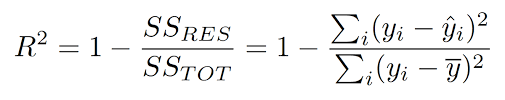

## SS<sub>reg</sub> means sum of squares of residuals of regression line, whereas
## SS<sub>tot</sub> means sum of squares of residuals of total or mean line.


In [24]:
print("R2 score=", r2_score(y_test, y_pred))

R2 score= 0.780730147510384


In [25]:
print("R2 score=", r2_score(y_pred, y_test))

R2 score= 0.6626575570753073


# Adjusted R2 score

In [26]:
r2 = r2_score(y_test, y_pred)

In [27]:
n, k = X_test.shape

In [28]:
k, n

(1, 40)

In [29]:
def r2_adjusted(x, n, k): 
  return (1 - ((1 - x) * (n - 1)) / (n - 1 - k))

In [30]:
r2adj = r2_adjusted(r2,n,k)

In [31]:
print("R2_adjusted=", r2adj)

R2_adjusted= 0.7749598882343415


# Relevance of adjusted R2 Score

In [32]:
new_df1 = df.copy()
new_df1["Random_feature"] = np.random.random(200)

new_df1 = new_df1[["cgpa", "Random_feature", "package"]]
new_df1.head()

,cgpa,Random_feature,package
0,6.89,0.249355,3.26
1,5.12,0.088354,1.98
2,7.82,0.168601,3.25
3,7.42,0.988920,3.67
4,6.94,0.061129,3.57


In [33]:
new_df1.shape

(200, 3)

Text(0, 0.5, 'Package')

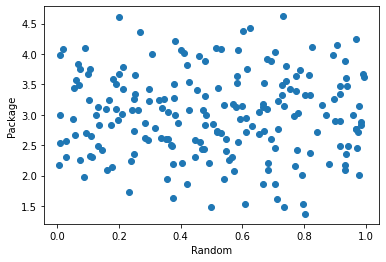

In [34]:
plt.scatter(new_df1.Random_feature, new_df1.package)
plt.xlabel("Random")
plt.ylabel("Package")

In [35]:
X = new_df1.iloc[:,0:2]
y = new_df1.package

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
r2new = r2_score(y_test, y_pred)

In [41]:
print("R2 score", r2new)

R2 score 0.7825079106310963


# Here we can see change in value of r2 and r2 new
## with addition of new irrelevant column, our r2score is increasing

In [42]:
r2, r2new

(0.780730147510384, 0.7825079106310963)

In [43]:
n, k = X_test.shape
n, k

(40, 2)

In [44]:
r2adjnew = r2_adjusted(r2new,n,k)

In [45]:
print("Adjusted R2 score", r2adjnew)

Adjusted R2 score 0.7707515814760204


# and adjusted r2 has brought the error down again

In [46]:
r2adj, r2adjnew

(0.7749598882343415, 0.7707515814760204)

# Now adding a relevant column

In [47]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [48]:
new_df2.sample(5)

,cgpa,iq,package
27,5.42,2.16,2.16
5,7.89,2.09,2.99
161,7.30,2.53,3.33
85,4.79,1.88,1.48
129,7.29,2.42,3.12


Text(0, 0.5, 'Package(in lpa)')

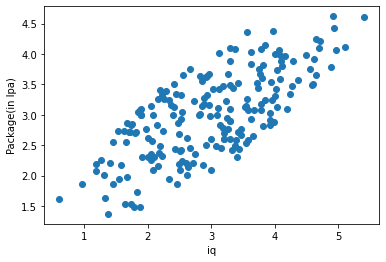

In [49]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [50]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("R2 score",r2_score(y_test,y_pred))
r2new2 = r2_score(y_test,y_pred)

R2 score 0.8231554313076099


In [52]:
n, k = X_test.shape
k, n

(2, 40)

In [54]:
r2adjnew2 = r2_adjusted(r2new2,n,k)
r2adjnew2

0.8135962654323456

# and Above we can see adjusted r2 score increased significantly